In [1]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

dados = fetch_openml('mnist_784', as_frame=False)

X, Y= dados.data, dados.target

In [2]:
X
X.shape

(70000, 784)

In [3]:
Y.shape

(70000,)

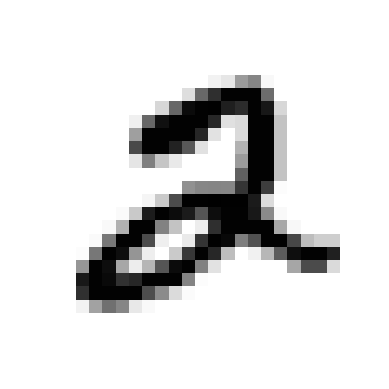

'2'

In [4]:
def mostrar_imagem(imagem):
    imagem = imagem.reshape(28,28)
    plt.imshow(imagem, cmap='binary')
    plt.axis('off')
digito = X[5]
mostrar_imagem(digito)
plt.show()
Y[5]

In [5]:
X_train, X_test, Y_train, Y_test = X[:60000], X[60000:],Y[:60000],Y[60000:]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.astype("float64"))
X_test = scaler.fit_transform(X_test.astype("float64"))
Y_train_2 = (Y_train == '2')
Y_test_2 = (Y_test == '2')
modelo = SGDClassifier(random_state=60)
cross_val_score(modelo , X_train, Y_train_2, cv=3, scoring='accuracy')

array([0.9745, 0.9767, 0.9801])

In [6]:
#cross_val_score(DummyClassifier(), X_train, Y_train_2, cv=3, scoring='accuracy')

In [7]:
y_pred = cross_val_predict(modelo, X_train, Y_train_2, cv = 5)
y_pred

array([False, False, False, ..., False, False, False])

In [8]:
matrix = confusion_matrix(Y_train_2, y_pred)
matrix

array([[53650,   392],
       [  933,  5025]], dtype=int64)

In [9]:
P = precision_score(Y_train_2, y_pred)
P


0.9276352224478494

In [10]:
R = recall_score(Y_train_2, y_pred)
R


0.8434038267875126

In [11]:
F = f1_score(Y_train_2, y_pred)
F

0.8835164835164835

In [12]:
modelo.fit(X_train, Y_train_2)
Y_score = modelo.decision_function([digito])
Y_score

array([22306.58097691])

In [13]:
Y_scores = cross_val_predict(modelo, X_train, Y_train_2, cv = 5 , method="decision_function")
Y_scores

array([ -489.56339   ,  -661.76968623,  -561.23064616, ...,
       -1171.63242908,  -609.99854833,  -690.71217634])

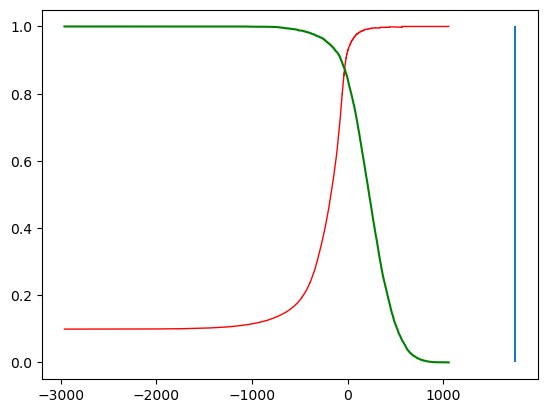

In [14]:
precisions, recalls, thresholds = precision_recall_curve(Y_train_2, Y_scores)

plt.plot(thresholds, precisions[:-1], 'r-', label="Precisão" , linewidth=1)
plt.plot(thresholds, recalls[:-1], '-g', label="Recall" )
plt.vlines(1752.2176321862391, 0, 1.0, linestyles ="solid", label="thresholds")
plt.show()

In [15]:
precisao_84 = (precisions >= 0.84).argmax()
thresholds_84 = thresholds[precisao_84]
thresholds_84

-44.258553920824

In [16]:
fpr, tpr, thresholds = roc_curve(Y_train_2, Y_scores)

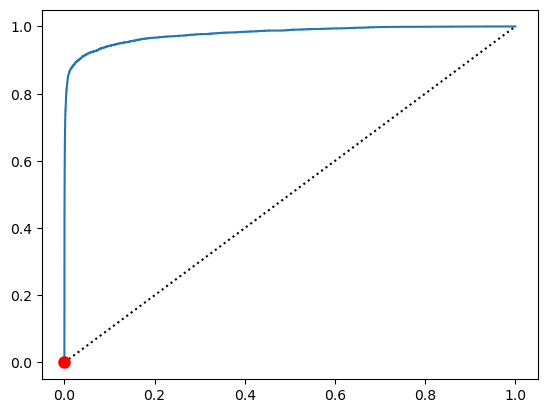

0.00016784155756965425

In [17]:
threshold_72 = (thresholds <= (precisions >= 0.72).argmax()).argmax()
tpr72, fpr72 = tpr[threshold_72], fpr[threshold_72]
plt.plot(fpr, tpr, label='Curva ROC')
plt.plot([0, 1], [0, 1], 'k:', label="Curva ROC-Modelo aleatório")
plt.plot([fpr72], [tpr72], "ro", markersize=8, zorder=5, label="Limite 72% de precisão")
plt.show()
tpr72

In [18]:
Roc = roc_auc_score(Y_train_2, Y_scores)
Roc

0.9783509112595887

In [ ]:
modelo_tree = RandomForestClassifier(random_state=60)
y_pred_tree = cross_val_predict(modelo_tree, X_train, Y_train_2, cv = 5, method='predict_proba')
y_scores_tree = y_pred_tree[:,1]
precision_tree, recall_tree, thresholds_tree = precision_recall_curve(Y_train_2, y_scores_tree)

plt.plot(recall_tree, precision_tree, label="Random Forest")

plt.plot(recalls, precisions, label="SGD")

plt.show()